# CVSN Assignment 4

- Sampad Kumar Kar
- MCS202215

In [84]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

from skimage.exposure import match_histograms

import os

In [2]:
# we define a helper function to print the image using `matplotlib`

# this prints colored image
def print_image(img, isGray=False, title="Image"):
    # OpenCV reads images in BGR, and matplotlib reads images in RGB
    # so, we switch the color channels using `cvtColor` method
    
    # if isGray = True, we first grayscale the image using the same `cvtColor` method
    if isGray:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_colored = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    else:
        img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,6))
    plt.imshow(img_colored)
    plt.axis(False)
    plt.title(title)
    plt.show()

# 1.

## 1.(a)

In [50]:
# plots histogram of given image
def plot_histogram(img_path, isgray=False):
    if isgray:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    else:
        img = cv2.imread(img_path)

    # plot histogram
    plt.figure(figsize=(5,5))
    plt.hist(img.ravel(), bins=256, range=[0, 256])
    plt.title("Intensity Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.show()

## 1.(b)

In [51]:
def histEqualize(img_path, isgray=False):
        if isgray:
            # read image as grayscaled image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            h,w = img.shape

            max_int = 256

            # extract histogram
            histogram, _ = np.histogram(img.ravel(), bins=max_int, range=[0, max_int])

            # convert it to density
            density = histogram/(h*w)

            # extract cummulative distribution
            cdf = np.cumsum(density)

            # define the transform
            histeq_transform = np.ones(max_int)*(max_int-1)

            for intensity in range(max_int):
                histeq_transform[intensity] *= cdf[intensity]
            
            transformed_img = np.zeros((h,w))
            for i in range(h):
                  for j in range(w):
                            transformed_img[i,j] = int(histeq_transform[img[i,j]])

        else:
            # read image as RGB image
            img = cv2.imread(img_path)
            h,w,c = img.shape

            max_int = 256

            # extract histogram
            histogram, _ = np.histogram(img.ravel(), bins=max_int, range=[0, max_int])

            # convert it to density
            density = histogram/(h*w*c)

            # extract cummulative distribution
            cdf = np.cumsum(density)

            # define the transform
            histeq_transform = np.ones(max_int)*(max_int-1)

            for intensity in range(max_int):
                histeq_transform[intensity] *= cdf[intensity]
            
            transformed_img = np.zeros((h,w,c))
            for i in range(h):
                  for j in range(w):
                        for k in range(c):
                              transformed_img[i,j,k] = int(histeq_transform[img[i,j,k]])
        
        return transformed_img, histeq_transform

## 1.(c)

In [52]:
# plots equalised histogram of given image
def plot_histeq_histogram(img_path, isgray=False):
    # extract the histogram equalised image
    img_equalized, _ = histEqualize(img_path, isgray)
    
    # plot histogram of the equalized image
    plt.figure(figsize=(5,5))
    plt.hist(img_equalized.ravel(), bins=256, range=[0, 256])
    plt.title("Intensity Equalized Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.show()

## 1.(d)

In [53]:
def plot_histeq_transform(imgpath, isgray):
    # extract histogram equalizing transform function
    _, histeq_transform = histEqualize(imgpath, isgray)

    max_int = 256

    plt.figure(figsize=(5,5))
    plt.plot(range(max_int), histeq_transform)
    plt.title("Transform Function")
    plt.xlabel("Intensity")
    plt.ylabel("Intensity")
    plt.show()

## 1.(e)

In [54]:
def display_histeq_img(imgpath, isgray):
    # extract image after histogram equalization
    img_histeq, _ = histEqualize(imgpath, isgray)

    if isgray:
        # extract original image
        img = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)

        # plot the images side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        # plot the original image
        ax1.imshow(img, cmap='gray')
        ax1.grid(False)
        ax1.set_title("Original Image")

        # plot the histogram equalized image
        ax2.imshow(img_histeq, cmap='gray')
        ax2.grid(False)
        ax2.set_title("Histogram Equalized Image")

        # show the plot
        plt.show()
        
        
    else:
        # extract original image
        img = cv2.imread(imgpath)
        # convert images from BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_histeq = cv2.cvtColor(img_histeq, cv2.COLOR_BGR2RGB)

        # plot the images side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        # plot the original image
        ax1.imshow(img)
        ax1.set_title("Original Image")

        # plot the histogram equalized image
        ax2.imshow(img_histeq)
        ax2.set_title("Histogram Equalized Image")

        # show the plot
        plt.show()

# 2.

## 2.(a)

Checking with images in drive.

### Chest X-Ray Image

In [55]:
img_path = os.path.join('data', 'Images', 'chestxray.png')
img_path

'data/Images/chestxray.png'

Histogram equalization using custom defined `histEqualize` function.

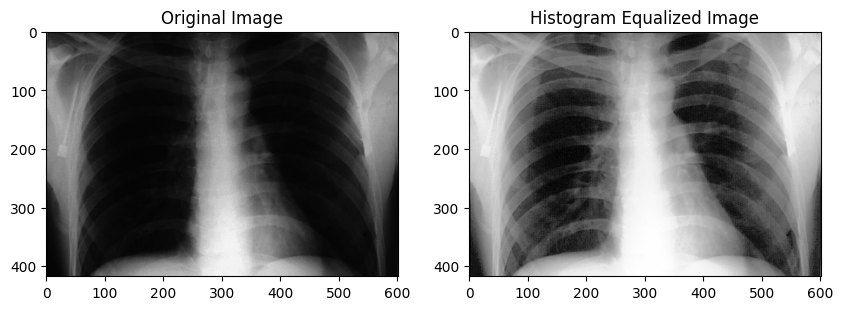

In [56]:
display_histeq_img(img_path, isgray=True)

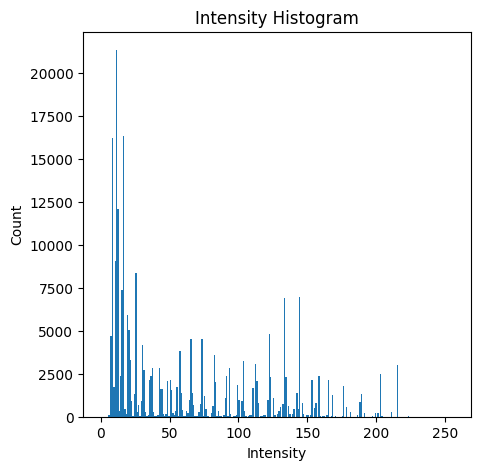

In [57]:
# plotting the histogram of original image
plot_histogram(img_path, isgray=True)

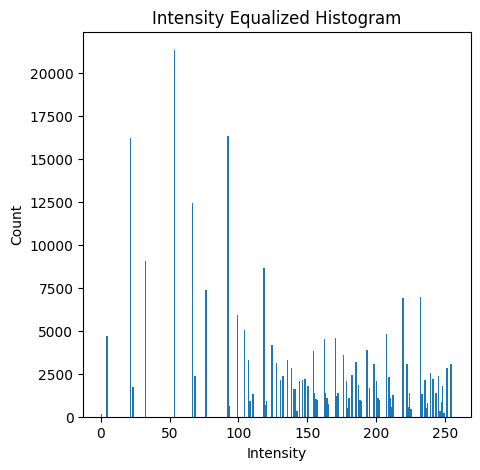

In [58]:
plot_histeq_histogram(img_path, isgray=True)

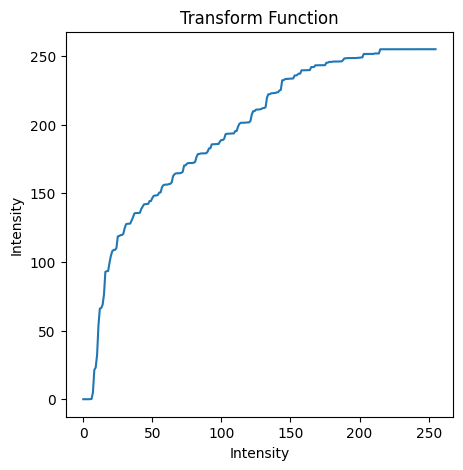

In [59]:
plot_histeq_transform(img_path, isgray=True)

Comparing the above to OpenCV's `cv2.equalizeHist` function.

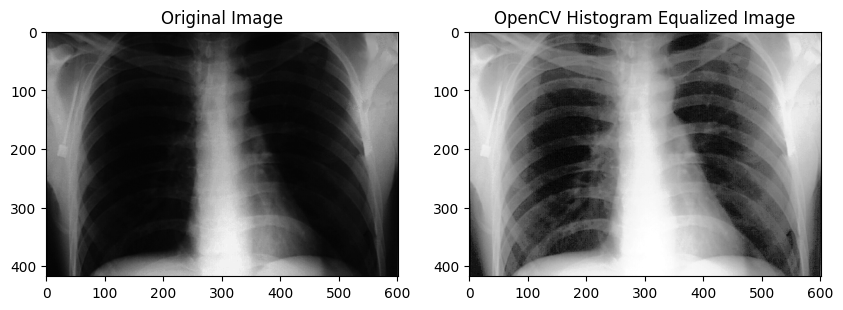

In [60]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_histeq_cv = cv2.equalizeHist(img)

# plot the images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot the original image
ax1.imshow(img, cmap='gray')
ax1.grid(False)
ax1.set_title("Original Image")

# plot the histogram equalized image
ax2.imshow(img_histeq_cv, cmap='gray')
ax2.grid(False)
ax2.set_title("OpenCV Histogram Equalized Image")

# show the plot
plt.show()

### Hawkes Bay Image

In [61]:
img_path = os.path.join('data', 'Images', 'HawkesBay.jpg')
img_path

'data/Images/HawkesBay.jpg'

Histogram equalization using custom defined `histEqualize` function.

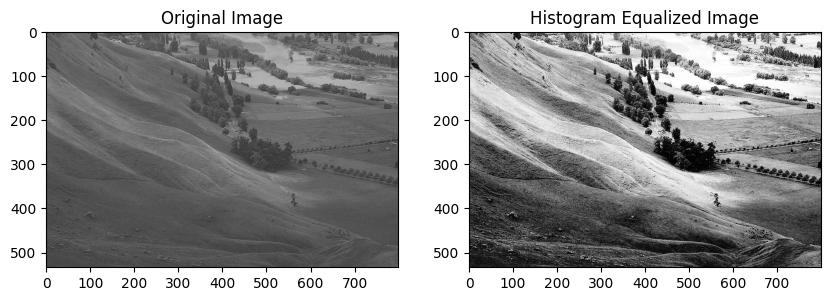

In [62]:
display_histeq_img(img_path, isgray=True)

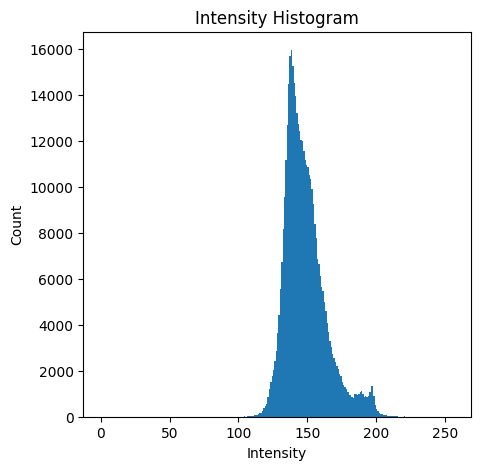

In [63]:
# plotting the histogram of original image
plot_histogram(img_path, isgray=True)

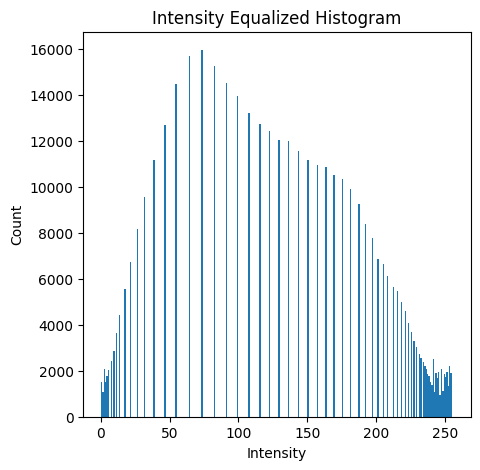

In [64]:
plot_histeq_histogram(img_path, isgray=True)

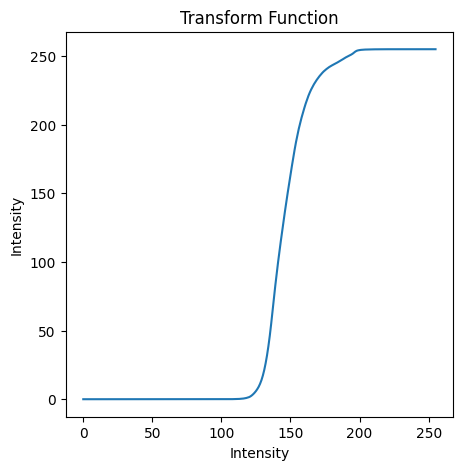

In [65]:
plot_histeq_transform(img_path, isgray=True)

Comparing the above to OpenCV's `cv2.equalizeHist` function.

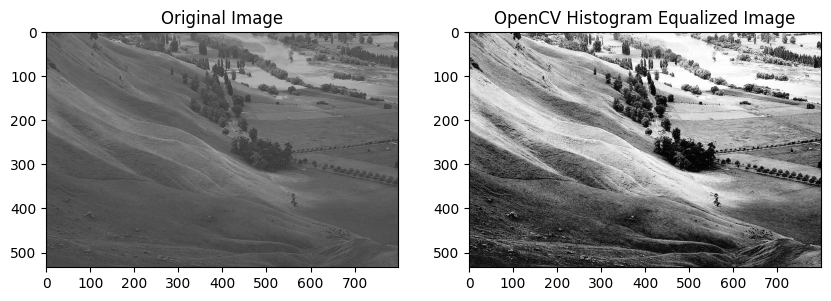

In [66]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_histeq_cv = cv2.equalizeHist(img)

# plot the images side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# plot the original image
ax1.imshow(img, cmap='gray')
ax1.grid(False)
ax1.set_title("Original Image")

# plot the histogram equalized image
ax2.imshow(img_histeq_cv, cmap='gray')
ax2.grid(False)
ax2.set_title("OpenCV Histogram Equalized Image")

# show the plot
plt.show()

## 2.(b)

The intensity distribution of the equalized histogram is not **exactly** uniform distribution, but **uniform distribution like**.

One possible cause is rounding off of pixel values after transformation. When we apply histogram equalization to an image, we map the original pixel values to new values based on their cumulative distribution function (CDF). This mapping may result in non-integer pixel values, which are then rounded off to the nearest integer. This rounding off introduces some loss of information and can cause the equalized histogram to deviate from a perfect uniform distribution. Hence, if the equalized histogram is theoretically a uniform distribution, the rounding off process introduces some quantization errors that can affect the shape of the histogram. For example, if the equalized histogram has a peak at a particular intensity level, rounding off the transformed pixel values may cause some of the values to fall into the adjacent bins, which can change the shape of the histogram.

# 3.

In [107]:
img1_path = os.path.join('data', 'Images', 'image1.jpg')
img2_path = os.path.join('data', 'Images', 'image2.jpg')

print(img1_path)
print(img2_path)

data/Images/image1.jpg
data/Images/image2.jpg


## 3.(a)

In [108]:
def plot_channel_histogram(img_path):
    img = cv2.imread(img_path)

    # extract colorc channels
    B,G,R = img[:,:,0], img[:,:,1], img[:,:,2]

    max_int = 256

    # plot the histograms side by side
    fig, (axB, axG, axR) = plt.subplots(1, 3, figsize=(15,5))
    
    # plot histogram of Blue channel
    axB.hist(B.ravel(), bins=max_int, range=[0,max_int], color='blue')
    axB.set_title("Histogram of Blue Channel")
    axB.set_xlabel("Intensity")
    axB.set_ylabel("Count")

    # plot histogram of Green channel
    axG.hist(G.ravel(), bins=max_int, range=[0,max_int], color='green')
    axG.set_title("Histogram of Green Channel")
    axG.set_xlabel("Intensity")
    axG.set_ylabel("Count")


    # plot histogram of Red channel
    axR.hist(R.ravel(), bins=max_int, range=[0,max_int], color='red')
    axR.set_title("Histogram of Red Channel")
    axR.set_xlabel("Intensity")
    axR.set_ylabel("Count")

    plt.show()

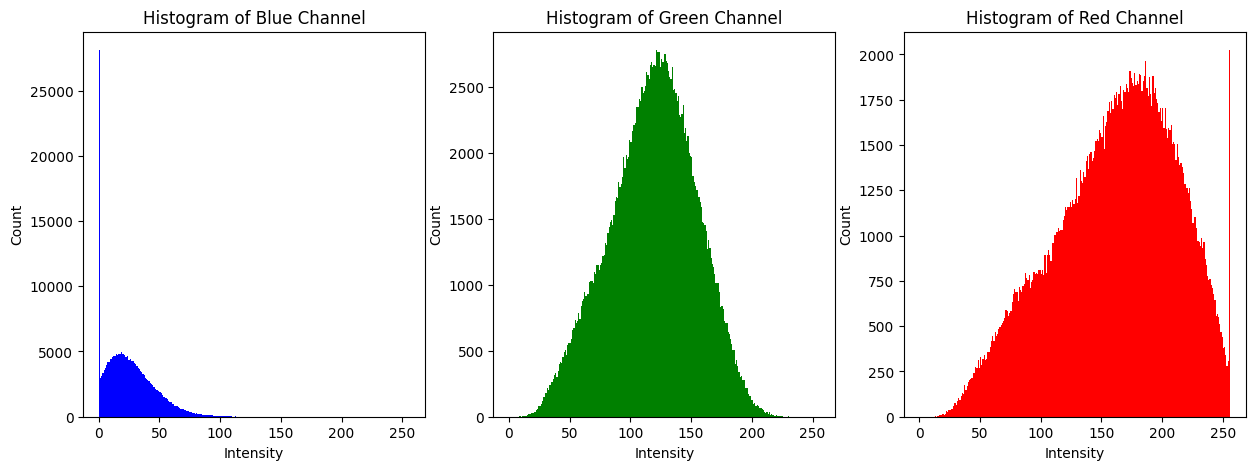

In [109]:
# channel histogram plots of image1
plot_channel_histogram(img1_path)

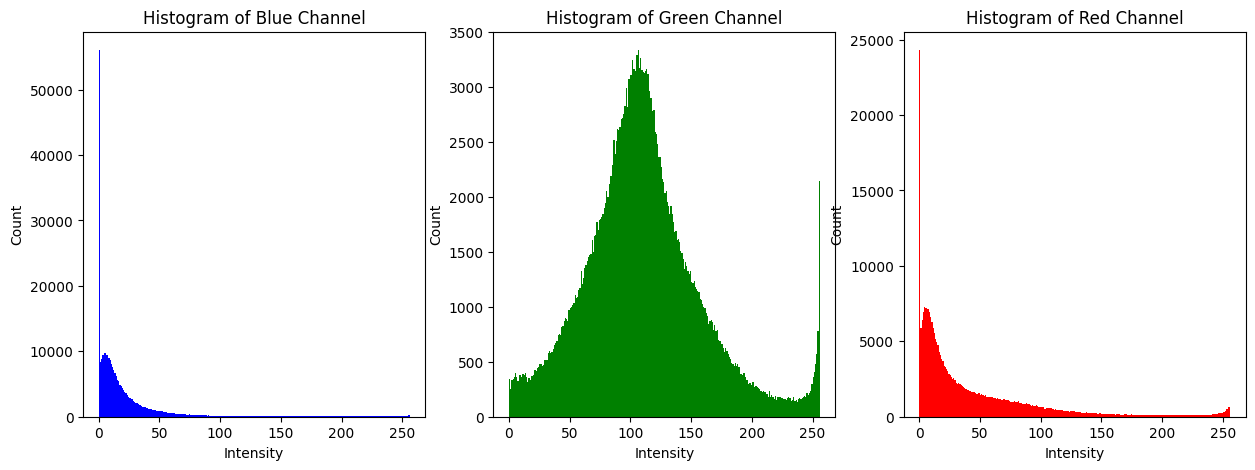

In [110]:
# channel histogram plots of image2
plot_channel_histogram(img2_path)

## 3.(b)

In [111]:
def histMatching(sourceimg, targetimg, color):
    # assume both to be single channel images
    max_int = 256
    
    # plot the source, target and matched image
    matchedimg = match_histograms(sourceimg, targetimg)

    fig, (axS, axT, axM) = plt.subplots(1, 3, figsize=(15,5))

    # plot histogram of sourceimg
    axS.hist(sourceimg.ravel(), bins=max_int, range=[0,max_int], color=color)
    axS.set_title("Histogram of Source Channel")
    axS.set_xlabel("Intensity")
    axS.set_ylabel("Count")

    # plot histogram of targetimg
    axT.hist(targetimg.ravel(), bins=max_int, range=[0,max_int], color=color)
    axT.set_title("Histogram of Target Channel")
    axT.set_xlabel("Intensity")
    axT.set_ylabel("Count")


    # plot histogram of mathcedimg
    axM.hist(matchedimg.ravel(), bins=max_int, range=[0,max_int], color=color)
    axM.set_title("Histogram of Matched Channel")
    axM.set_xlabel("Intensity")
    axM.set_ylabel("Count")

    plt.show()

    return matchedimg

In [112]:
# extract B, G, R channels from image1 and image2
img1 = cv2.imread(img1_path)
img1B, img1G, img1R = img1[:,:,0], img1[:,:,1], img1[:,:,2]

img2 = cv2.imread(img2_path)
img2B, img2G, img2R = img2[:,:,0], img2[:,:,1], img2[:,:,2]

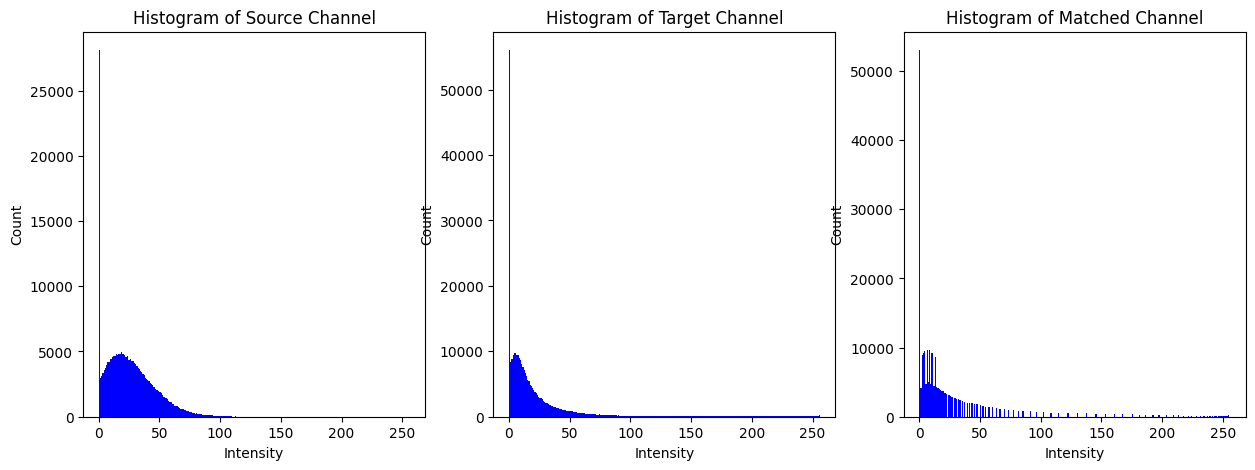

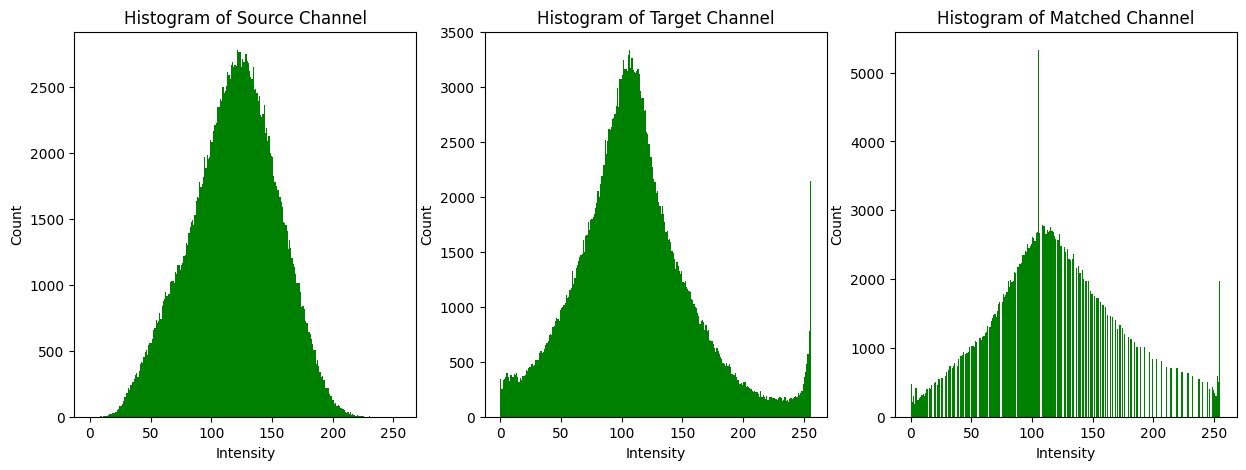

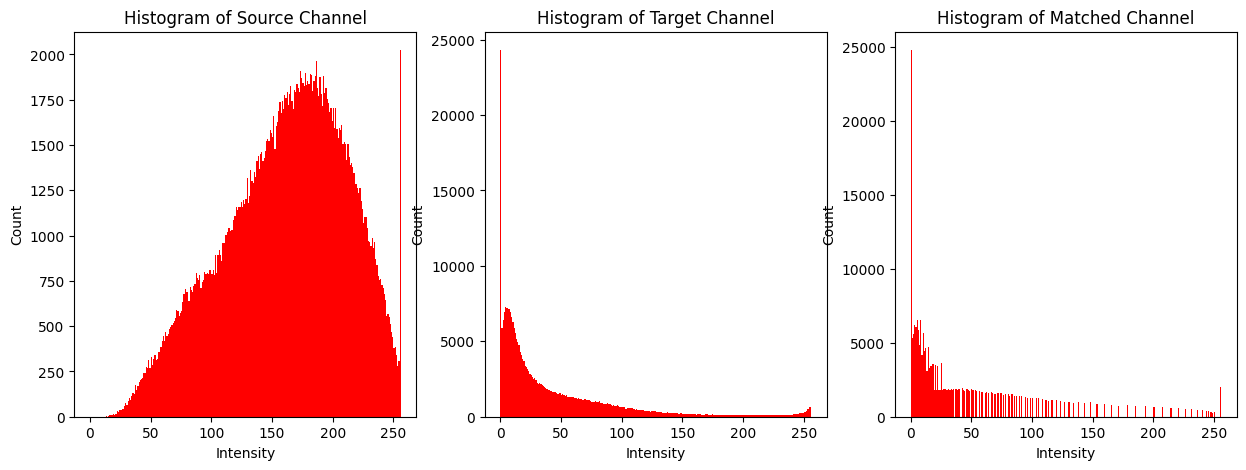

In [113]:
# match the corresponding B, G, R channels of image1 with image2
img1B_matched = histMatching(img1B, img2B, 'blue')
img1G_matched = histMatching(img1G, img2G, 'green')
img1R_matched = histMatching(img1R, img2R, 'red')

## 3.(c)

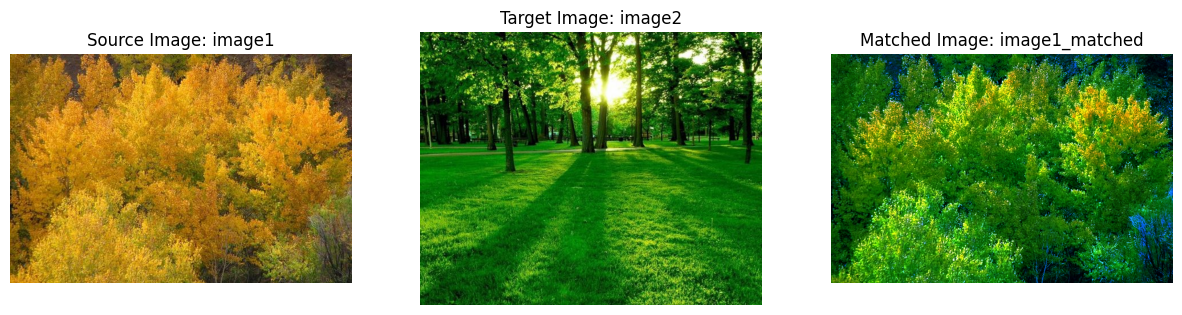

In [118]:
# reconstructing img1 in colors

# combine all three matched channels together
img1_matched = img1.copy()
img1_matched[:,:,0], img1_matched[:,:,1], img1_matched[:,:,2] = img1B_matched, img1G_matched, img1R_matched

# convert all the images from BGR to RGB to display
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img1_matched = cv2.cvtColor(img1_matched, cv2.COLOR_BGR2RGB)

# plot the images side by side
fig, (ax1, ax2, axM) = plt.subplots(1, 3, figsize=(15,5))

ax1.imshow(img1)
ax1.set_axis_off()
ax1.set_title("Source Image: image1")

ax2.imshow(img2)
ax2.set_axis_off()
ax2.set_title("Target Image: image2")

axM.imshow(img1_matched)
axM.set_axis_off()
axM.set_title("Matched Image: image1_matched")

plt.show()

## 3.(d)

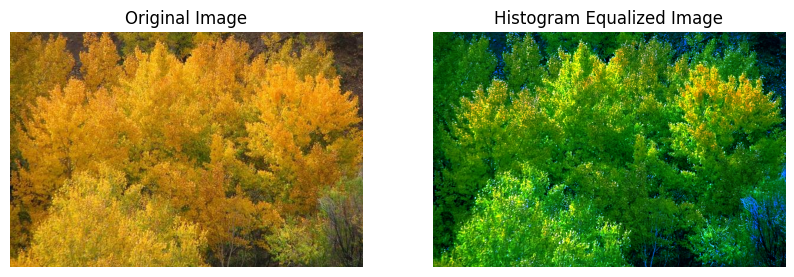

In [121]:
# comparing source and matched image side by side
fig, (ax1, axM) = plt.subplots(1, 2, figsize=(10,5))

# plot the original image
ax1.imshow(img1)
ax1.set_axis_off()
ax1.set_title("Original Image")

# plot the histogram equalized image
axM.imshow(img1_matched)
axM.set_axis_off()
axM.set_title("Histogram Equalized Image")

# show the plot
plt.show()

# 4.

To be attempted later.

# 5.

## 5.(a)

We highlight a particular range and set the rest to zero.

In [125]:
img_path  = os.path.join('data', 'Images', 'image2.jpg')
img_path

'data/Images/image2.jpg'

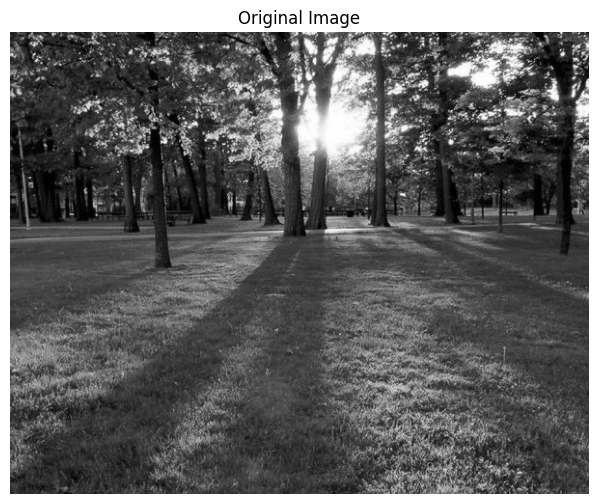

In [132]:
# read as grayscale image
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print_image(img_gray, title="Original Image")

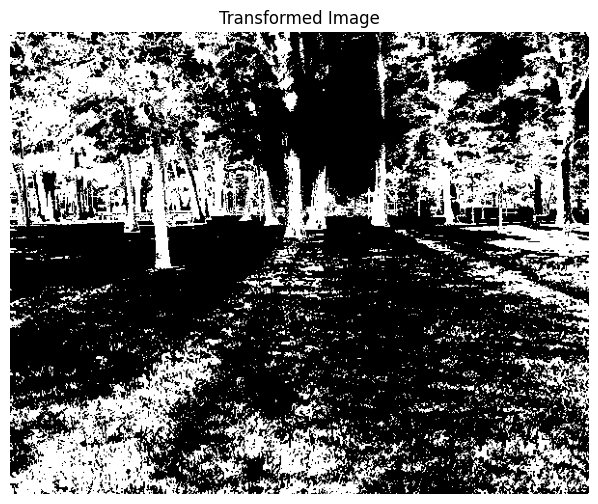

In [135]:
# Construct new image based on custom transformation

max_int = 256

min_range = 10
max_range = 60

custom_transform1 = [0 for _ in range(256)]
for i in range(min_range, max_range):
    custom_transform1[i] = 255

img_gray_transformed = img_gray.copy()

for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        img_gray_transformed[i,j] = custom_transform1[img_gray[i,j]]

print_image(img_gray_transformed, title="Transformed Image")

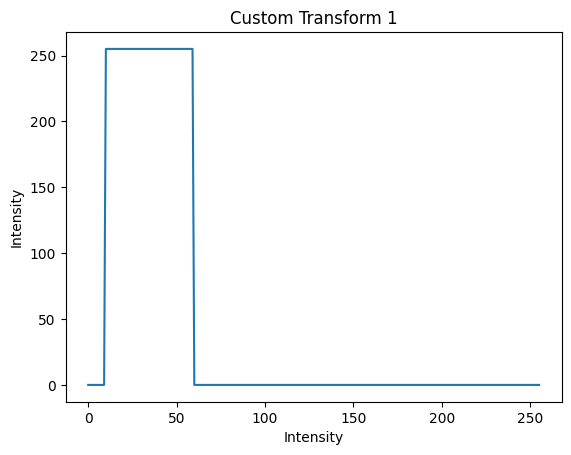

In [137]:
plt.figure()
plt.plot(range(max_int), custom_transform1)
plt.xlabel("Intensity")
plt.ylabel("Intensity")
plt.title("Custom Transform 1")
plt.show()

## 5.(b)

Now, we highlight a particular range and leave the rest unchanged.

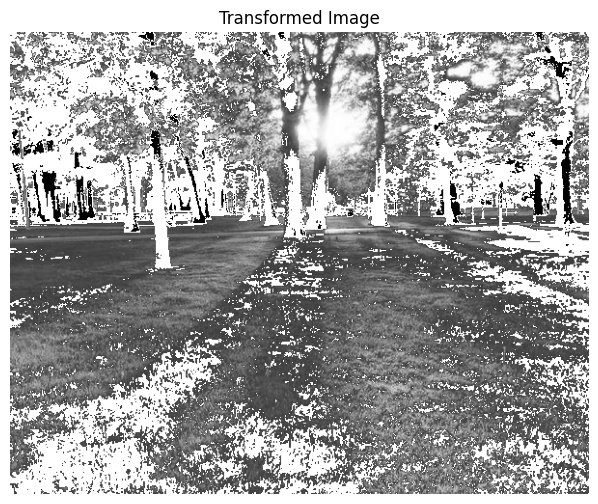

In [138]:
# Construct new image based on custom transformation

max_int = 256

min_range = 10
max_range = 60

custom_transform2 = [i for i in range(256)]
for i in range(min_range, max_range):
    custom_transform2[i] = 255

img_gray_transformed = img_gray.copy()

for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        img_gray_transformed[i,j] = custom_transform2[img_gray[i,j]]

print_image(img_gray_transformed, title="Transformed Image")

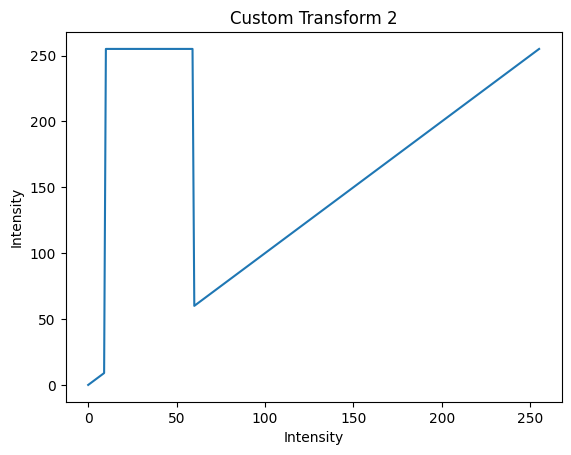

In [140]:
plt.figure()
plt.plot(range(max_int), custom_transform2)
plt.xlabel("Intensity")
plt.ylabel("Intensity")
plt.title("Custom Transform 2")
plt.show()

# 6.

In [141]:
img_path = os.path.join('data', 'Images', 'chestxray.png')
img_path

'data/Images/chestxray.png'

## 6.(a)

Text(0.5, 1.0, 'bitplane7')

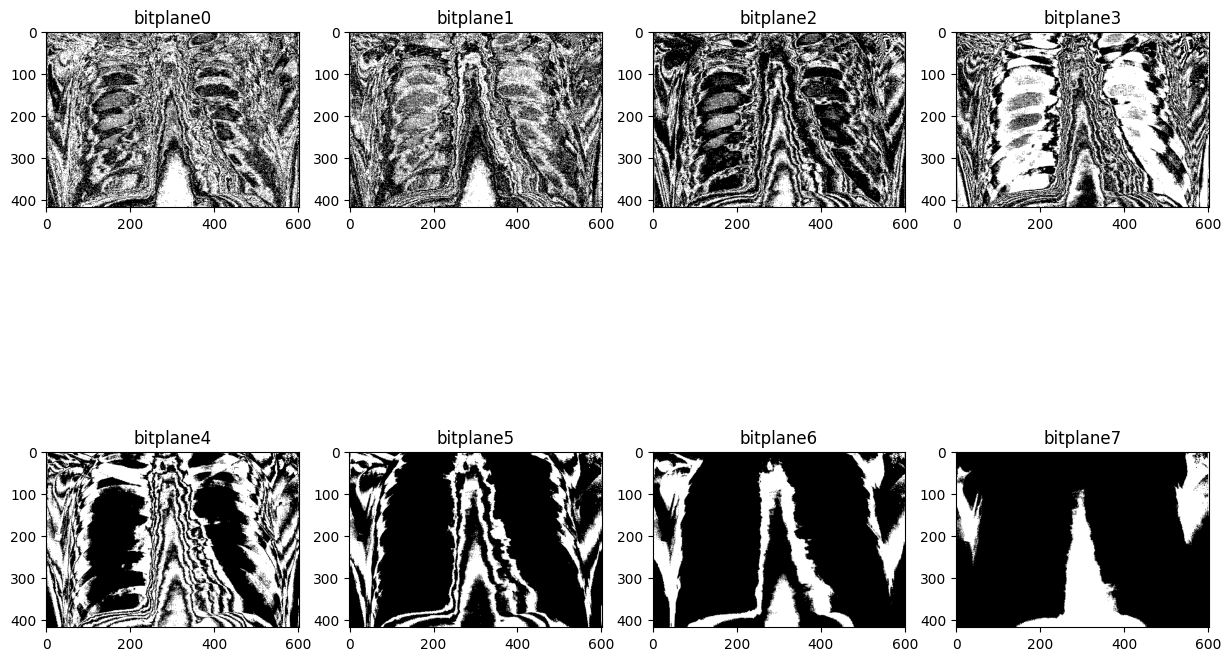

In [146]:
img = cv2.imread(img_path)
h,w,c = img.shape

lst = []
for i in range(h):
    for j in range(w):
         lst.append(np.binary_repr(int(img[i][j][0]) ,width=8)) # width = no. of bits

bit7 = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(h,w)
bit6 = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(h,w)
bit5 = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(h,w)
bit4 = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(h,w)
bit3 = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(h,w)
bit2 = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(h,w)
bit1 = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(h,w)
bit0 = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(h,w)

f,axarr=plt.subplots(2,4,figsize=(15,10))

im0=axarr[0,0].imshow(bit0,cmap="gray")
axarr[0,0].set_title("bitplane0")

im1=axarr[0,1].imshow(bit1,cmap="gray")
axarr[0,1].set_title("bitplane1")

im2=axarr[0,2].imshow(bit2,cmap="gray")
axarr[0,2].set_title("bitplane2")

im3=axarr[0,3].imshow(bit3,cmap="gray")
axarr[0,3].set_title("bitplane3")

im4=axarr[1,0].imshow(bit4,cmap="gray")
axarr[1,0].set_title("bitplane4")

im4=axarr[1,1].imshow(bit5,cmap="gray")
axarr[1,1].set_title("bitplane5")

im4=axarr[1,2].imshow(bit6,cmap="gray")
axarr[1,2].set_title("bitplane6")

im4=axarr[1,3].imshow(bit7,cmap="gray")
axarr[1,3].set_title("bitplane7")

## 6.(b)

In [150]:
def get_bit_transform(n):
    max_int = 256
    transform = np.zeros((max_int), dtype='uint8')

    if n > 7:
        return None
    
    for i in range (1<<n, 1<<(n+1)):
        transform[i] = i
    
    return transform

Text(0.5, 1.0, 'Bit7 Transform')

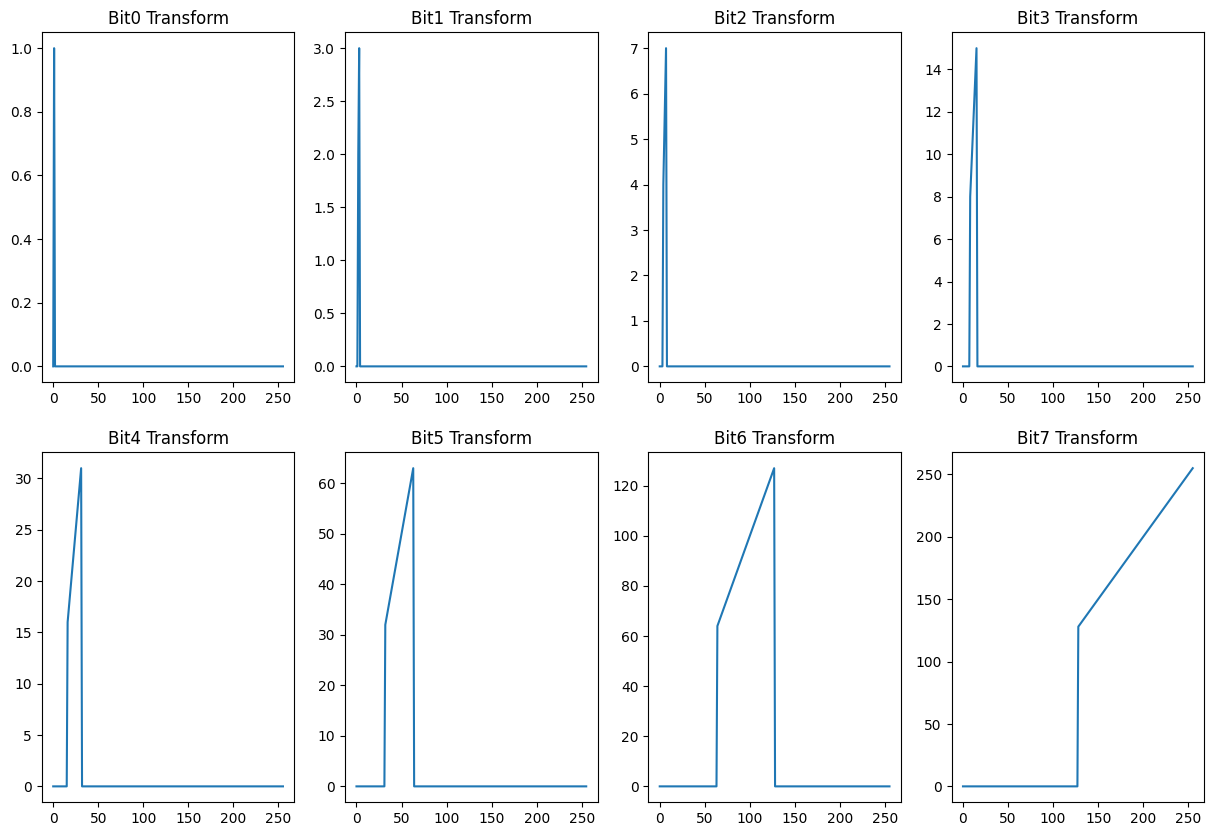

In [152]:
bit7_transform = get_bit_transform(7)
bit6_transform = get_bit_transform(6)
bit5_transform = get_bit_transform(5)
bit4_transform = get_bit_transform(4)
bit3_transform = get_bit_transform(3)
bit2_transform = get_bit_transform(2)
bit1_transform = get_bit_transform(1)
bit0_transform = get_bit_transform(0)

f,axarr=plt.subplots(2,4,figsize=(15,10))

im0=axarr[0,0].plot(range(max_int),bit0_transform)
axarr[0,0].set_title("Bit0 Transform")

im1=axarr[0,1].plot(range(max_int),bit1_transform)
axarr[0,1].set_title("Bit1 Transform")

im2=axarr[0,2].plot(range(max_int),bit2_transform)
axarr[0,2].set_title("Bit2 Transform")

im3=axarr[0,3].plot(range(max_int),bit3_transform)
axarr[0,3].set_title("Bit3 Transform")

im4=axarr[1,0].plot(range(max_int),bit4_transform)
axarr[1,0].set_title("Bit4 Transform")

im4=axarr[1,1].plot(range(max_int),bit5_transform)
axarr[1,1].set_title("Bit5 Transform")

im4=axarr[1,2].plot(range(max_int),bit6_transform)
axarr[1,2].set_title("Bit6 Transform")

im4=axarr[1,3].plot(range(max_int),bit7_transform)
axarr[1,3].set_title("Bit7 Transform")

## 6.(c)

We need 4 bitplanes to get a reasonable reconstruction of the original image.

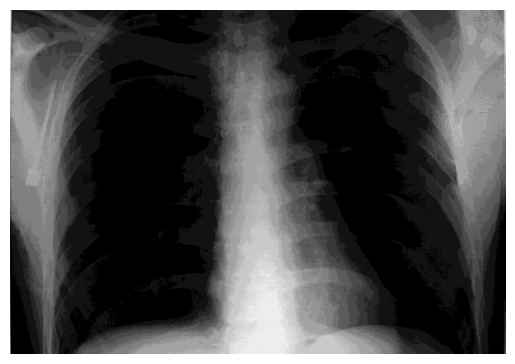

In [145]:
# best reconstructed image
best_reconstruced_img = bit4 + bit5 + bit6 + bit7
plt.figure()
plt.imshow(best_reconstruced_img, cmap='gray')
plt.axis(False)
plt.show()